In [33]:
import random
from PIL import Image
import uuid
from IPython.display import display
import numpy as np
import datetime
import BruteJusticeSpreadsheets

In [17]:
class Breedable:
    ''' Superclass for any breedable following the rgb stat format'''
    def __init__(self, r=0, g=0, b=0, name=''):
        # The stats of the breedable are represented as rgb color values
        self.r = int(r)
        self.g = int(g)
        self.b = int(b)
        # The breedable has a unique id and an optional name
        self.id = uuid.uuid4()
        self.name = name
    def Breed(self, other):
        # Only allow breeding of the same type
        if(type(other) != type(self)):
            return None
        else:
            # Convert rgb stats to byte strings
            # Python syntax: {:08b} means to format a number into 8 bits with leading zeros if necessary
            ownRed = '{:08b}'.format(self.r)
            otherRed = '{:08b}'.format(other.r)
            ownGreen = '{:08b}'.format(self.g)
            otherGreen = '{:08b}'.format(other.g)
            ownBlue = '{:08b}'.format(self.b)
            otherBlue = '{:08b}'.format(other.b)
            newRed = []
            newGreen = []
            newBlue = []
            # Randomly determine which parent's bit goes into the child
            for red in range(len(ownRed)):
                if(random.randint(0,1)):
                    newRed.append(ownRed[red])
                else:
                    newRed.append(otherRed[red])
            for green in range(len(ownGreen)):
                if(random.randint(0,1)):
                    newGreen.append(ownGreen[green])
                else:
                    newGreen.append(otherGreen[green])
            for blue in range(len(ownBlue)):
                if(random.randint(0,1)):
                    newBlue.append(ownBlue[blue])
                else:
                    newBlue.append(otherBlue[blue])
            red = int(''.join(newRed), 2)
            green = int(''.join(newGreen), 2)
            blue = int(''.join(newBlue), 2)
            # return a generic breedable. A subclass should convert this appropriately
            return Breedable(red, green, blue)
        
    def New():
        # Instantiate a random Breedable
        r = random.randint(0,255)
        g = random.randint(0,255)
        b = random.randint(0,255)
        return Breedable(r, g, b)

In [66]:
class Egg(Breedable):
    '''A subclass of Breedable for dinosaur Eggs'''
    def __init__(self, r=0, g=0, b=0, name='', index=-1):
        # Create a normal Breedable with personality traits
        super(Egg, self).__init__(r,g,b,name)
        # Call disposition based on genes
        self.aggression, self.energy, self.friendliness = self.Disposition()
        # If the Egg has no name, name it after its ID
        # This can be reassigned as needed
        if(name != ''):
            self.name = name
        else:
            self.name = str(self.id)
        self.timestamp = datetime.datetime.now()
        self.index = index
    def __repr__(self):
        # Display the egg's information
        display(self.Show())
        text = "Name: {}\nID: {}\nr: {}\ng: {}\nb: {}\n".format(self.name, self.id, self.r, self.g, self.b)
        text += "I have {} aggression, {} energy, and {} friendliness!\n".format(self.aggression, self.energy, self.friendliness)
        text += "I'm of the species {}!".format(self.Species())
        return text
    
    def Show(self):
        # Show own stats as an image
        return Image.new(mode='RGB', size=(100,100), color=(self.r, self.g, self.b))
    
    def NewFromBreedable(breedable):
        # Take a generic Breedable and convert to an Egg
        r = breedable.r
        g = breedable.g
        b = breedable.b
        egg = Egg(r, g, b)
        egg.id = breedable.id
        return egg
        
    def Breed(self, other):
        # Breed with another Egg
        return Egg.NewFromBreedable(super(Egg, self).Breed(other))

    def New():
        # Create a new random Egg
        r = random.randint(0,255)
        g = random.randint(0,255)
        b = random.randint(0,255)
        return Egg(r, g, b)
    
    def Disposition(self):
        ''' Determine personality traits based off genetics.
            The cutoffs here are purely arbitrary.'''
        # Red
        if(self.r > 200):
            aggression = 'High'
        elif(self.r > 100):
            aggression = 'Medium'
        else:
            aggression = 'Low'
            
        # Green
        if(self.g > 200):
            energy = 'High'
        elif(self.g > 100):
            energy = 'Medium'
        else:
            energy = 'Low'
            
        # Blue
        if(self.b > 200):
            friendliness = 'High'
        elif(self.b > 100):
            friendliness = 'Medium'
        else:
            friendliness = 'Low'
        return aggression, energy, friendliness
    def Species(self):
        '''Determine species based off genetics.
        The cutoffs here are purely arbitrary.
        Different species may still breed, it is just a text change.'''
        if(self.r == 255 and self.g == 255 and self.b == 255):
            species = 'Dragon'
        elif(self.r == 0 and self.g == 0 and self.b == 0):
            species = 'Primordial Goo'
        elif(self.aggression == 'High' and self.energy == 'High'):
            species = 'Velociraptor'
        elif(self.aggression == 'High' and self.energy == 'Medium'):
            species = 'Tyrannosaurus Rex'
        elif(self.aggression == 'High' and self.energy == 'Low'):
            species = 'Floating Shark'
        elif(self.aggression == 'Medium' and self.energy == 'High'):
            species = 'Pterodactyl'
        elif(self.aggression == 'Medium' and self.energy == 'Medium'):
            species = 'Ankylosaurus'
        elif(self.aggression == 'Medium' and self.energy == 'Low'):
            species = 'Snake'
        elif(self.aggression == 'Low' and self.energy == 'High'):
            species = 'Triceratops'
        elif(self.aggression == 'Low' and self.energy == 'Medium'):
            species = 'Sauropod'
        elif(self.aggression == 'Low' and self.energy == 'Low'):
            species = 'Dragon Turtle'
        else:
            species = 'Primordial Goo'
        return species
    def Hatch(self):
        dino = Dinosaur(self.r, self.g, self.b)
        dino.id = self.id
        return dino
    

In [24]:
starter = Egg(69, 217, 42)

In [25]:
rival = Egg(62, 12, 242)

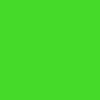

Name:
ID:9595d969-763a-4873-a29c-9ca0467c7c09
r: 69
g: 217
b: 42
I have Low aggression, High energy, and Low friendliness!
I'm of the species Triceratops!

In [26]:
starter

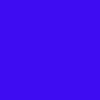

ID:48a0f89a-6826-4efe-bb9d-a341843e5511
r: 62
g: 12
b: 242
I have Low aggression, Low energy, and High friendliness!
I'm of the species Dragon Turtle!

In [7]:
rival

In [12]:
eggs = [rival.Breed(starter) for x in range(1000)]

In [85]:
reds = []
greens = []
blues = []
for egg in eggs:
    reds.append(egg.r)
    greens.append(egg.g)
    blues.append(egg.b)

In [18]:
eggs = [Egg.New() for x in range(100000)]
speciesDict = {}
for egg in eggs:
    if(egg.Species() in speciesDict):
        speciesDict[egg.Species()] += 1
    else:
        speciesDict[egg.Species()] = 0
print(speciesDict)

{'Pterodactyl': 8492, 'Dragon Turtle': 15402, 'Sauropod': 15457, 'Snake': 15408, 'Tyrannosaurus Rex': 8184, 'Velociraptor': 4661, 'Ankylosaurus': 15385, 'Triceratops': 8426, 'Floating Shark': 8576}


In [8]:
import BruteJusticeSpreadsheets

In [9]:
sheetID = '14t3Rm5JwswRvJRgx7qxNfliX0i6cJNfCGpnLTOj2fCQ'
BruteJusticeSpreadsheets.ReadSpreadsheet('ID', sheetID)

[['7903174f-bf02-4815-bb62-04037f0a5e04'],
 ['90cc4349-3492-4e41-a383-073ab515f24f']]

In [34]:
def StoreEgg(egg):
    IDs = BruteJusticeSpreadsheets.ReadSpreadsheet('ID', sheetID)
    if([str(egg.id)] not in IDs):
        BruteJusticeSpreadsheets.WriteSpreadsheet(sheetID, cell='A'+str(len(IDs)+1), value=str(egg.id))
        BruteJusticeSpreadsheets.WriteSpreadsheet(sheetID, cell='B'+str(len(IDs)+1), value=str((egg.r, egg.g, egg.b)))
        BruteJusticeSpreadsheets.WriteSpreadsheet(sheetID, cell='C'+str(len(IDs)+1), value=str(egg.timestamp))
        BruteJusticeSpreadsheets.WriteSpreadsheet(sheetID, cell='D'+str(len(IDs)+1), value=str(egg.name))
        BruteJusticeSpreadsheets.WriteSpreadsheet(sheetID, cell='E'+str(len(IDs)+1), value=len(IDs)+1)

In [36]:
def RetrieveEgg(ID, name=False):
    if(not name):
        IDs = BruteJusticeSpreadsheets.ReadSpreadsheet('ID', sheetID)
        if([str(ID)] not in IDs):
            print('Egg not found.')
            return None
        else:
            rgbString = BruteJusticeSpreadsheets.ReadSpreadsheet('rgb', sheetID)[IDs.index([ID])][0]
            rgb = [int(x) for x in rgbString.replace('(', '').replace(',','').replace(')', '').split()]
            timestamp = BruteJusticeSpreadsheets.ReadSpreadsheet('timestamp', sheetID)[IDs.index([ID])]
            egg = Egg(rgb[0], rgb[1], rgb[2])
            egg.id = ID
            egg.name = BruteJusticeSpreadsheets.ReadSpreadsheet('name', sheetID)[IDs.index([ID])]
            egg.timestamp = timestamp
            egg.index = IDs.index([ID])
            return egg
    else:
        names = BruteJusticeSpreadsheets.ReadSpreadsheet('name', sheetID)
        if([str(ID)] not in names):
            print('Egg not found.')
            return None
        else:
            rgbString = BruteJusticeSpreadsheets.ReadSpreadsheet('rgb', sheetID)[names.index([ID])][0]
            rgb = [int(x) for x in rgbString.replace('(', '').replace(',','').replace(')', '').split()]
            timestamp = BruteJusticeSpreadsheets.ReadSpreadsheet('timestamp', sheetID)[names.index([ID])]
            egg = Egg(rgb[0], rgb[1], rgb[2])
            egg.id = BruteJusticeSpreadsheets.ReadSpreadsheet('ID', sheetID)[names.index([ID])]
            egg.name = ID
            egg.timestamp = timestamp
            egg.index = IDs.index([ID])
            return egg

In [81]:
def RetrieveEggByIndex(index):
    row = BruteJusticeSpreadsheets.ReadSpreadsheet('A{}:{}'.format(index+1,index+1), sheetID)
    if(row):
        rgb = [int(x) for x in row[0][1].replace('(', '').replace(',','').replace(')', '').split()]
        egg = Egg(rgb[0], rgb[1], rgb[2], name=row[0][3], index = index)
        egg.id = uuid.UUID(row[0][0])
        egg.timestamp = row[0][2]
        if(row[0][3] == ''):
            egg.name = egg.id
        return egg
    else:
        return None

In [87]:
def RetrieveEggByName(name):
    names = BruteJusticeSpreadsheets.ReadSpreadsheet('name', sheetID)
    if([name] not in names):
        print('Egg {} not found.'.format(name))
        return None
    else:
        row = BruteJusticeSpreadsheets.ReadSpreadsheet('A{}:{}'.format(names.index([name])+1,names.index([name])+1), sheetID)
        if(row):
            rgb = [int(x) for x in row[0][1].replace('(', '').replace(',','').replace(')', '').split()]
            egg = Egg(rgb[0], rgb[1], rgb[2], name=row[0][3], index = row[0][-1])
            egg.id = uuid.UUID(row[0][0])
            egg.timestamp = row[0][2]
            if(row[0][3] == ''):
                egg.name = egg.id
            return egg
        else:
            return None

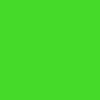

Name: Bulbasaur
ID: 7903174f-bf02-4815-bb62-04037f0a5e04
r: 69
g: 217
b: 42
I have Low aggression, High energy, and Low friendliness!
I'm of the species Triceratops!

In [88]:
RetrieveEggByName('Bulbasaur')

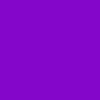

Name: 889c1aeb-b30a-4dad-b9e2-b9235f6d3b43
ID: 889c1aeb-b30a-4dad-b9e2-b9235f6d3b43
r: 133
g: 6
b: 203
I have Medium aggression, Low energy, and High friendliness!
I'm of the species Snake!

In [82]:
RetrieveEggByIndex(2)

In [57]:
foo = uuid.uuid4()

In [59]:
uuid.UUID('7903174f-bf02-4815-bb62-04037f0a5e04')

UUID('7903174f-bf02-4815-bb62-04037f0a5e04')

In [54]:
RetrieveEggByIndex(0)

[['7903174f-bf02-4815-bb62-04037f0a5e04', '(69, 217, 42)', '2018-03-28 20:15:08', 'Bulbasaur', '0']]


In [106]:
rgbString = BruteJusticeSpreadsheets.ReadSpreadsheet('rgb', sheetID)[0][0]

In [107]:
rgbString

'(69, 217, 42)'

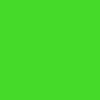

Name: Bulbasaur
ID: ['7903174f-bf02-4815-bb62-04037f0a5e04']
r: 69
g: 217
b: 42
I have Low aggression, High energy, and Low friendliness!
I'm of the species Triceratops!

In [29]:
RetrieveEgg('Bulbasaur', name=True)

In [30]:
StoreEgg(Egg.New())

In [31]:
names = BruteJusticeSpreadsheets.ReadSpreadsheet('name', sheetID)
names

[['Bulbasaur'], ['Squirtle']]

In [83]:
rgb.index()

[['(69, 217, 42)'], ['(62, 12, 242)']]

In [68]:
rgb = BruteJusticeSpreadsheets.ReadSpreadsheet('rgb', sheetID)

In [82]:
[int(x) for x in rgb[0][0].replace('(', '').replace(',','').replace(')', '').split()]

[69, 217, 42]

In [67]:
StoreEgg(starter)
StoreEgg(rival)

In [57]:
starter.id

UUID('109a9530-614e-4289-81ae-6fad644ff28c')

In [58]:
rival.id

UUID('850a124c-381c-4a42-a051-e2b4495cad6b')

In [30]:
foo = time.localtime()

In [56]:
import datetime

In [59]:
str(datetime.datetime.now())

'2018-03-28 20:14:41.594253'

In [43]:
foo

time.struct_time(tm_year=2018, tm_mon=3, tm_mday=28, tm_hour=20, tm_min=7, tm_sec=24, tm_wday=2, tm_yday=87, tm_isdst=1)

In [44]:
foo.tm_year, foo.tm_mon, foo.tm_mday

(2018, 3, 28)

In [48]:
'{}{:02}{:02}_{:02}{:02}{:02}'.format(foo.tm_year, foo.tm_mon, foo.tm_mday, foo.tm_hour, foo.tm_min, foo.tm_sec)

'20180328_200724'